<h1 style="text-align: center;">Pengenalan PGFPlotsX<h1>
<h3 style="text-align: center;">Fadjar Fathurrahman<h3>

PGFPlotsX adalah paket Julia untuk menghasilkan plot 2d dan 3d melalui pustaka LaTeX bernama pgfplots.

In [1]:
using PGFPlotsX

In [2]:
using SpecialFunctions

Cek apakah program `pdftosvg` tersedia.

In [3]:
PGFPlotsX.HAVE_PDFTOSVG

true

Plot dengan data-data koordinat

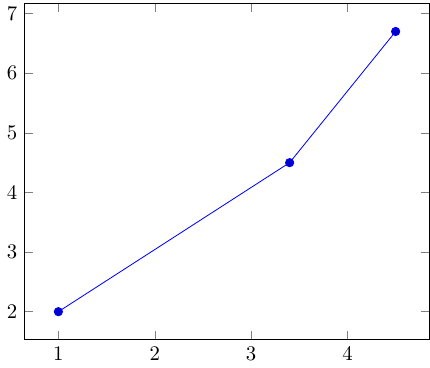

In [5]:
@pgf TikzPicture( Axis(
    Plot( Coordinates([
            (1.0, 2.0),
            (3.4, 4.5),
            (4.5, 6.7),
        ])
    )
) )

In [15]:
x = 0.0:1.0

0.0:1.0:1.0

In [21]:
tpl1 = [(x, 1/x) for x in -5:5]

11-element Array{Tuple{Int64,Float64},1}:
 (-5, -0.2)               
 (-4, -0.25)              
 (-3, -0.3333333333333333)
 (-2, -0.5)               
 (-1, -1.0)               
 (0, Inf)                 
 (1, 1.0)                 
 (2, 0.5)                 
 (3, 0.3333333333333333)  
 (4, 0.25)                
 (5, 0.2)                 

In [22]:
typeof(tpl1)

Array{Tuple{Int64,Float64},1}

In [28]:
c1 = Coordinates([
        (1.2, 3.4),
        (3.2, 4.5),
        (3.4, 3.4)
     ]);
c2 = Coordinates([
        (0.0, 4.0),
        (4.5, 2.4),
        (1.0, 4.5)
     ]);

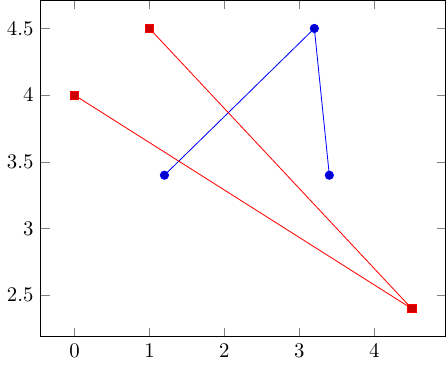

In [29]:
@pgf Axis(
    PlotInc(c1),
    PlotInc(c2),
)

In [46]:
x = range(0.0, 1.0, length=50);
y = sin.(2*pi*x);
y2 = cos.(2*pi*x);

In [47]:
c = Coordinates(x,y);
c2 = Coordinates(x,y2);

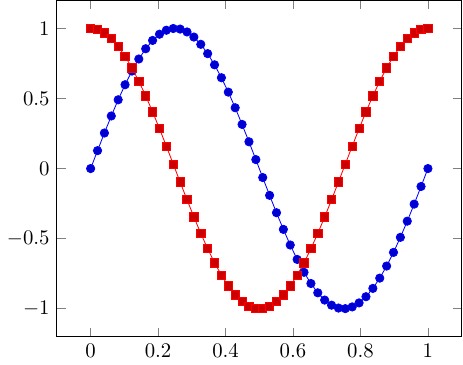

In [48]:
@pgf Axis(
    PlotInc(c),
    PlotInc(c2),
)

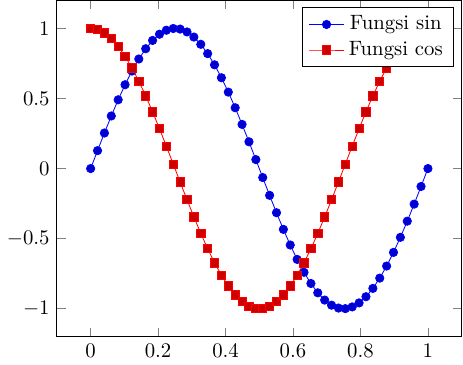

In [49]:
@pgf Axis(
    PlotInc(c),
    LegendEntry("Fungsi sin"),
    PlotInc(c2),
    LegendEntry("Fungsi cos"),
)

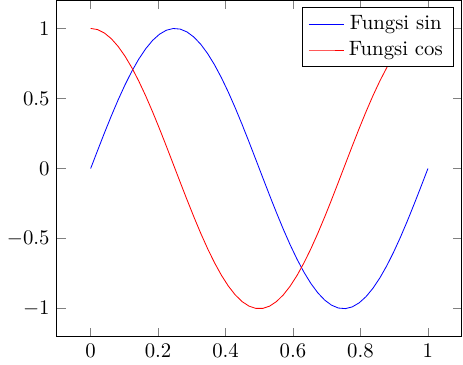

In [52]:
@pgf Axis(
    {no_markers},
    PlotInc(c),
    LegendEntry("Fungsi sin"),
    PlotInc(c2),
    LegendEntry("Fungsi cos"),
)

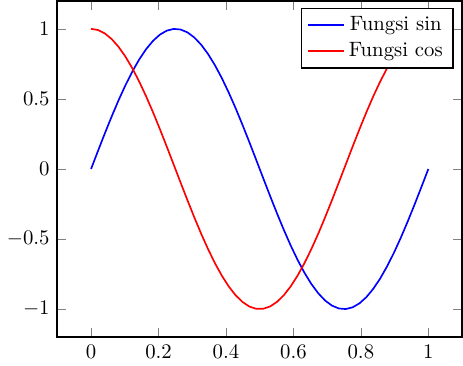

In [53]:
@pgf Axis(
    {
      no_markers,
      thick,
    },
    PlotInc(c),
    LegendEntry("Fungsi sin"),
    PlotInc(c2),
    LegendEntry("Fungsi cos"),
)

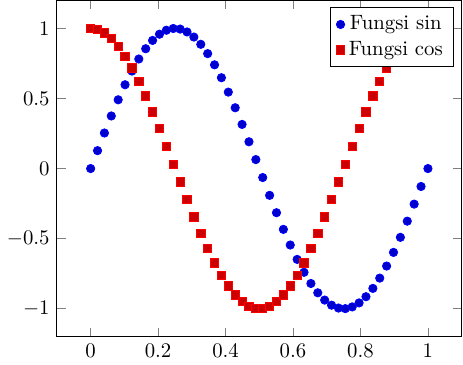

In [55]:
@pgf Axis(
    {
      only_marks,
    },
    PlotInc(c),
    LegendEntry("Fungsi sin"),
    PlotInc(c2),
    LegendEntry("Fungsi cos"),
)

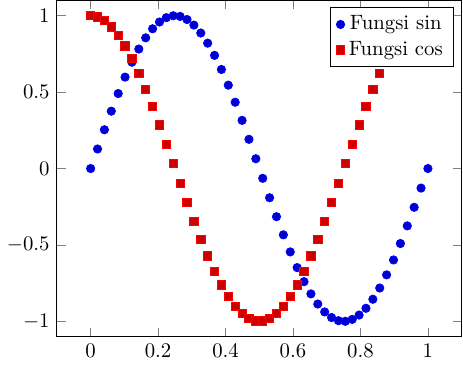

In [57]:
@pgf Axis(
    {
      only_marks,
      ymin = -1.1,
      ymax = 1.1,
    },
    PlotInc(c),
    LegendEntry("Fungsi sin"),
    PlotInc(c2),
    LegendEntry("Fungsi cos"),
)

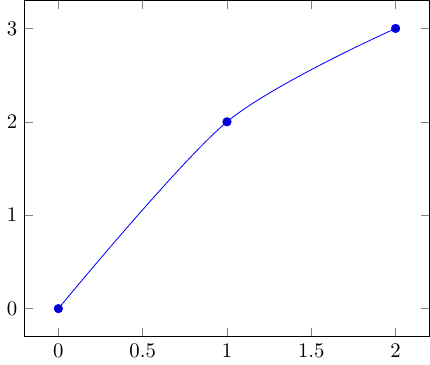

In [58]:
@pgf Axis(
    PlotInc(
        {smooth},
        Coordinates([ (0,0), (1,2), (2,3) ])
    )
)

# Menggunakan Table

In [14]:
?Table

search: Table TableData mutable struct iswritable isimmutable bytesavailable



```
Table([options], ...; ...)
```

Tabular data with options, corresponding to `table[options] { ... }` in PGFPlots.

`options` stores the options. If that is followed by an `AbstractString`, that will be used as a filename to read data from, otherwise all the arguments are passed on to [`TableData`](@ref).

Examples:

```julia
Table(["x" => 1:10, "y" => 11:20])        # from a vector

Table([1:10, 11:20])                      # same contents, unnamed

Table(Dict(:x => 1:10, :y = 11:20))       # a Dict with symbols

@pgf Table({ "x index" = 2, "y index" = 1" }, randn(10, 3))

let x = range(0; stop = 1, length = 10), y = range(-2; stop =  3, length = 15)
    Table(x, y, sin.(x + y'))             # edges & matrix
end
```


# Two dimensional plot types

## Linear plot

### sharp plots

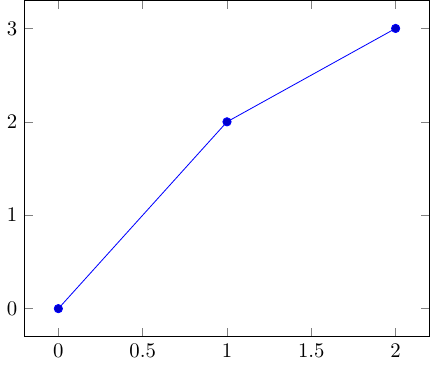

In [11]:
@pgf Axis(
    PlotInc(
        {"sharp plot"},
        Coordinates([(0,0), (1,2), (2,3)])
    )
)

### smooth plots

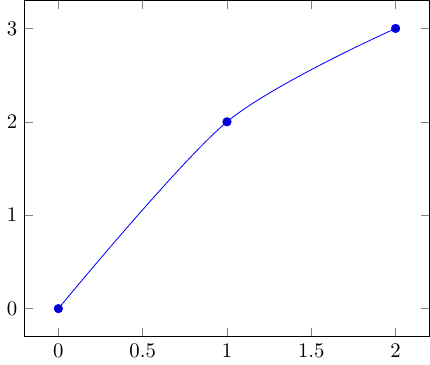

In [12]:
@pgf Axis(
    PlotInc(
        {"smooth"},
        Coordinates([(0,0), (1,2), (2,3)])
    )
)

### Constant plots

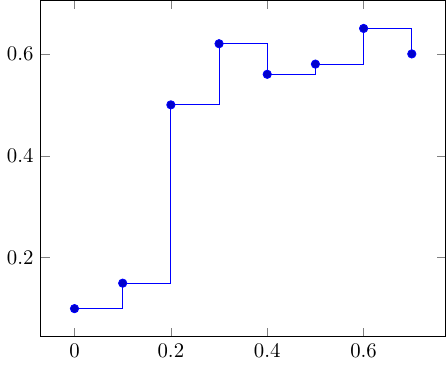

In [14]:
@pgf Axis(
    PlotInc(
        {"const plot"},
        Coordinates([
        (0,0.1), (0.1,0.15), (0.2,0.5), (0.3,0.62),
        (0.4,0.56), (0.5,0.58), (0.6,0.65), (0.7,0.6)
        ])
    )
)

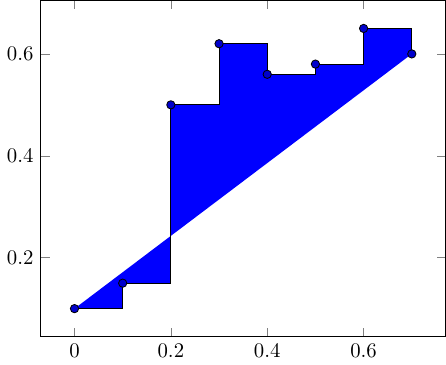

In [16]:
@pgf Axis(
    PlotInc(
        {"const plot",
        fill="blue",
        draw="black"},
        Coordinates([
        (0,0.1), (0.1,0.15), (0.2,0.5), (0.3,0.62),
        (0.4,0.56), (0.5,0.58), (0.6,0.65), (0.7,0.6)
        ])
    )
)

### bar plot

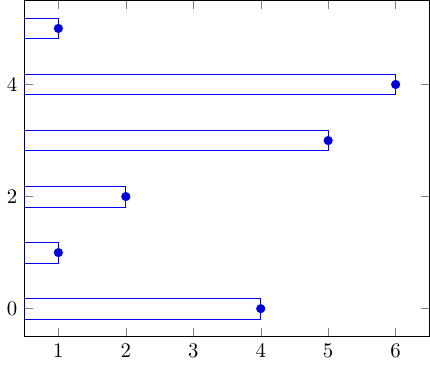

In [17]:
@pgf Axis(
    PlotInc( {"xbar"},
        Coordinates([ (4,0), (1,1), (2,2), (5,3), (6,4), (1,5) ])
    )
)

# Three dimensional plots

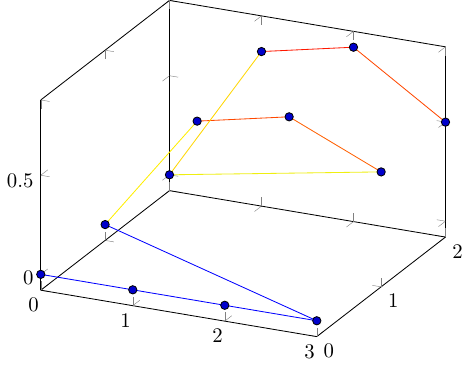

In [27]:
@pgf Axis(
    Plot3Inc({surf}, Coordinates([
        (0,0,0), (1,0,0), (2,0,0), (3,0,0),
        
        (0,1,0), (1,1,0.6), (2,1,0.7), (3,1,0.5),
        
        (0,2,0), (1,2,0.7), (2,2,0.8), (3,2,0.5)])
    )
)

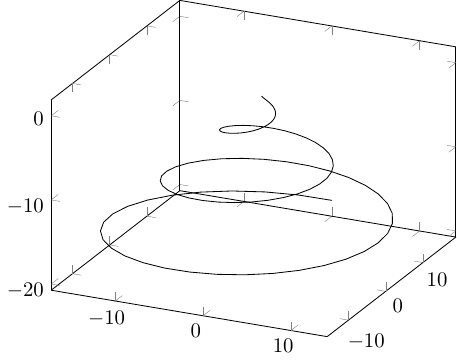

In [26]:
t = range(0; stop = 6*π, length = 100)
@pgf Plot3(
    {
        no_marks,
    },
    Coordinates(t .* sin.(t), t .* cos.(t), .-t)
)

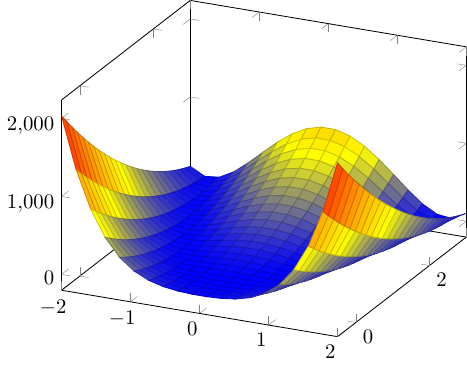

In [28]:
x = range(-2; stop = 2, length = 20)
y = range(-0.5; stop = 3, length = 25)
f(x, y) = (1 - x)^2 + 100*(y - x^2)^2
@pgf Plot3(
    {
        surf,
    },
    Coordinates(x, y, f.(x, y'))
)

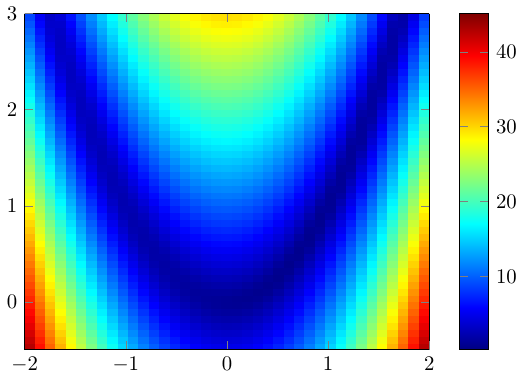

In [29]:
x = range(-2; stop = 2, length = 40)
y = range(-0.5; stop = 3, length = 50)
@pgf Axis(
    {
        view = (0, 90),
        colorbar,
        "colormap/jet",
    },
    Plot3(
        {
            surf,
            shader = "flat",
        },
        Coordinates(x, y, @. √(f(x, y')))
    )
)

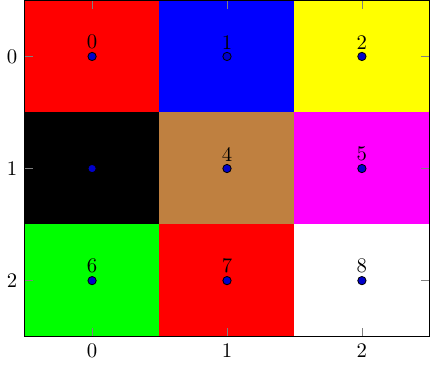

In [30]:
x = repeat(0:2, outer = 3)
y = repeat(0:2, inner = 3)
meta = ["color=$c" for c in ["red", "blue", "yellow", "black", "brown", "magenta", "green", "red", "white"]]
c = Coordinates(x, y; meta = meta)
@pgf Axis(
    {
        enlargelimits = false,
        xtick = [0, 1, 2]
    },
    PlotInc(
        {
            matrix_plot,
            mark = "*",
            nodes_near_coords = raw"\coordindex",
            "mesh/color input" = "explicit",
            "mesh/cols" = 3
        },
        c,
    )
)

# Old stuffs

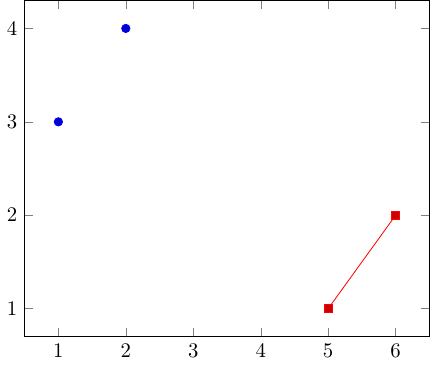

In [4]:
@pgf TikzPicture(
        Axis(
            PlotInc({ only_marks },
                Table(; x = 1:2, y = 3:4)),
            PlotInc(
                Table(; x = 5:6, y = 1:2))))

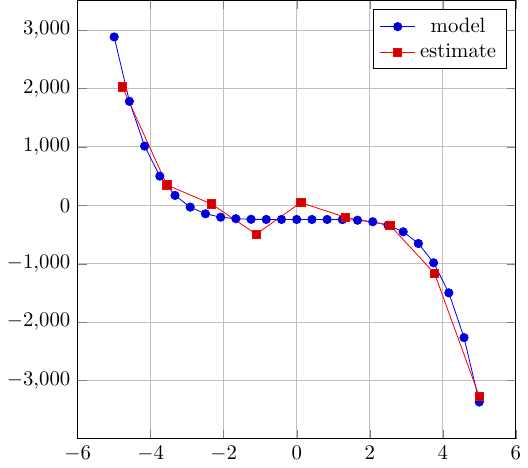

In [50]:
fig = @pgf Axis(
    {
        height = "9cm",
        width = "9cm",
        grid = "major",
    },
    PlotInc(Expression("-x^5 - 242")),
    LegendEntry("model"),
    PlotInc(Coordinates(
        [
            (-4.77778,2027.60977),
            (-3.55556,347.84069),
            (-2.33333,22.58953),
            (-1.11111,-493.50066),
            (0.11111,46.66082),
            (1.33333,-205.56286),
            (2.55556,-341.40638),
            (3.77778,-1169.24780),
            (5.00000,-3269.56775),
        ]
    )),
    LegendEntry("estimate")
)

In [19]:
x = Array(eps():0.05:5);

In [28]:
y = -2.0*erf.(Array(x))./x;

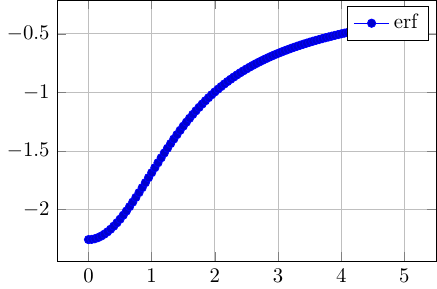

In [27]:
fig = @pgf Axis(
    {
        height = "6cm",
        width = "8cm",
        grid = "major",
    },
    PlotInc(Coordinates(x,y)),
    LegendEntry("erf")
)

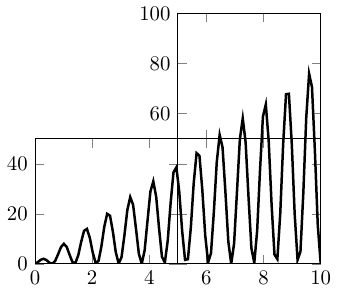

In [29]:
# this is an imitation of the figure in the manual, as we generate the data
x = range(0; stop = 10, length = 100)
@pgf plot = Plot({very_thick}, Table(x = x, y = @. (sin(x * 8) + 1) * 4 * x))
@pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 2",
            horizontal_sep="0pt",
            vertical_sep="0pt",
            xticklabels_at="edge bottom"
        },
        xmin = 0,
        ymin = 0,
        height = "3.7cm",
        width = "4cm",
        no_markers
    },
    nothing,
    {xmin=5, xmax=10, ymin=50, ymax=100},
    plot,
    {xmax=5, ymax=50},
    plot,
    {xmin=5, xmax=10, ymax=50, yticklabels={}},
    plot)